In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Task1

In [6]:
#reading CSV file
data = pd.read_csv('samplecar.csv')

In [7]:
#Displaying data
data.head(10)

,Type,Price,Buy
0,SUV,H,No
1,HB,H,No
2,HB,H,Yes
3,HB,L,No
4,SEDAN,H,Yes
5,SEDAN,L,Yes
6,SUV,L,No
7,SEDAN,H,Yes
8,HB,L,Yes
9,SUV,Hot,Yes


In [8]:
data.info() #checking data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    10 non-null     object
 1   Price   10 non-null     object
 2   Buy     10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [138]:
#definng feature value as 'X' and target value as 'y'
X = data.iloc[:,1:2]
y = data.iloc[:,2:3]
X

,Price
0,H
1,H
2,H
3,L
4,H
5,L
6,L
7,H
8,L
9,Hot


In [91]:
sum_row = len(X) #lenth of row data
sum_yes = len(data[data['Buy']=='Yes']) #lenth of yes data
sum_no = len(data[data['Buy']=='No']) #lenth of no data

In [11]:
#calcuating probability of getting yes or no.
prob_y = sum_yes/sum_row
prob_n = sum_no/sum_row

In [12]:
print('probability of getting yes =',prob_y) #printing probability of yes and no
print('probability of getting no =',prob_n)

probability of getting yes = 0.6
probability of getting no = 0.4


In [13]:
#implementing formula to find total entropy 
entropy_data = -prob_y * np.log2(prob_y) - prob_n * np.log2(prob_n)

In [14]:
#printing the total entropy value
print('The total enytropy is',entropy_data)

The total enytropy is 0.9709505944546686


In [15]:
type_df = data['Type'].unique()
type_df #checking data type

array(['SUV', 'HB', 'SEDAN'], dtype=object)

In [16]:
#defining data according to its value
suv = data[data['Type']=='SUV']
hb = data[data['Type']=='HB']
sedan = data[data['Type']=='SEDAN']

In [17]:
#printing suv value data only
suv.head()

,Type,Price,Buy
0,SUV,H,No
6,SUV,L,No
9,SUV,Hot,Yes


In [18]:
#printing hb value data only
hb

,Type,Price,Buy
1,HB,H,No
2,HB,H,Yes
3,HB,L,No
8,HB,L,Yes


In [19]:
#defining yes value as suv_y and no value as suv_n in 'Buy'
suv_row = len(suv)
suv_y = len(suv[suv['Buy']=='Yes'])
suv_n = len(suv[suv['Buy']=='No'])

In [20]:
#for SUV calculating probability of getting yes or no
prob_suv_y = suv_y/suv_row 
prob_suv_n = suv_n/suv_row

In [21]:
#implenting formula to find entropy
entropy_suv = -prob_suv_y * np.log2(prob_suv_y) - prob_suv_n * np.log2(prob_suv_n)

In [22]:
print('the entropy value is',entropy_suv)

the entropy value is 0.9182958340544896


In [23]:
#defining data
hb_row = len(hb)
hb_y = len(hb[hb['Buy']=='Yes'])
hb_n = len(hb[hb['Buy']=='No'])

In [24]:
#for Hb calculating the probabilty of getting yes or no
prob_hb_y = hb_y/hb_row
prob_hb_n = hb_n/hb_row

In [25]:
#implementing formula
entropy_hb = -prob_hb_y * np.log2(prob_hb_y) - prob_hb_n * np.log2(prob_hb_n)

In [26]:
print('the entropy value is',entropy_hb)

the entropy value is 1.0


In [27]:
#defining data
sedan_row = len(sedan)
sedan_y = len(sedan[sedan['Buy']=='Yes'])
sedan_n = len(sedan[sedan['Buy']=='No'])


In [116]:
sedan_y

3

In [117]:
sedan_n

0

In [118]:
sedan_row

3

In [28]:
#for sedan calculating the probabilty of getting yes or no
prob_sedan_y = sedan_y/sedan_row
prob_sedan_n = sedan_n/sedan_row

In [29]:
print('probability of getting yes =',prob_sedan_y) #printing probability of yes and no
print('probability of getting no =',prob_sedan_n)

probability of getting yes = 1.0
probability of getting no = 0.0


In [139]:
prob_sedan_n.isnull().values.any()

AttributeError: 'float' object has no attribute 'isnull'

In [30]:
#implementing formula to find entropy
entropy_sedan = -prob_sedan_y * np.log2(prob_sedan_y) - 0

In [31]:
print('the entropy is',entropy_sedan)

the entropy is -0.0


In [32]:
#calculating the probability of fettinf suv, hb, sedan
suv_prob = suv_row/sum_row
hb_prob = hb_row/sum_row
sedan_prob = sedan_row/sum_row

In [33]:
#implementing formula
Info_gain_type = entropy_data - ((suv_prob*entropy_suv)+(sedan_prob*entropy_sedan)+(hb_prob*entropy_hb))

In [34]:
print(Info_gain_type)

0.29546184423832167


In [35]:
#making 'price' data unique
data['Price'].unique()

array(['H', 'L', 'Hot'], dtype=object)

In [36]:
#defining price data
H = data[data['Price']=='H'] #where H is high
L = data[data['Price']=='L'] #where L is low

In [37]:
#for H of Price data
H_row = len(H)
H_y = len(H[H['Buy']=='Yes'])
H_n = len(H[H['Buy']=='No'])

In [38]:
#calcuating probility 
prob_H_y = H_y/H_row
prob_H_n = H_n/H_row
entropy_H = -prob_H_y * np.log2(prob_H_y) - prob_H_n * np.log2(prob_H_n)

In [39]:
print(entropy_H)

0.9709505944546686


In [40]:
#for L of price data
L_row = len(L)
L_y = len(L[L['Buy']=='Yes'])
L_n = len(L[L['Buy']=='No'])

In [41]:
#calculating probability
prob_L_y = L_y/L_row
prob_L_n = L_n/L_row
entropy_L = -prob_L_y * np.log2(prob_L_y) - prob_L_n * np.log2(prob_L_n)

In [42]:
print(entropy_L)

1.0


In [43]:
#calculating info gain price
H_prob = H_row/sum_row
L_prob = L_row/sum_row

Info_gain_Price = entropy_data - ((H_prob*entropy_H)+(L_prob*entropy_L))

In [44]:
print('The info gain price is', Info_gain_Price)

The info gain price is 0.08547529722733427


The attribute of "Type" had higher infromation gain.

# Task 2

In [64]:
df = pd.read_csv('house_data.csv') #reading csv data

In [65]:
df.head(10) #displaying top 10 data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987
5,257500.0,3,2.25,1715,6819,2.0,1715,1995
6,291850.0,3,1.50,1060,9711,1.0,1060,1963
7,229500.0,3,1.00,1780,7470,1.0,1050,1960
8,323000.0,3,2.50,1890,6560,2.0,1890,2003
9,662500.0,3,2.50,3560,9796,1.0,1860,1965


In [66]:
df.isnull().values.any() #checking either thier value is nan orr not

False

<AxesSubplot:xlabel='floors', ylabel='price'>

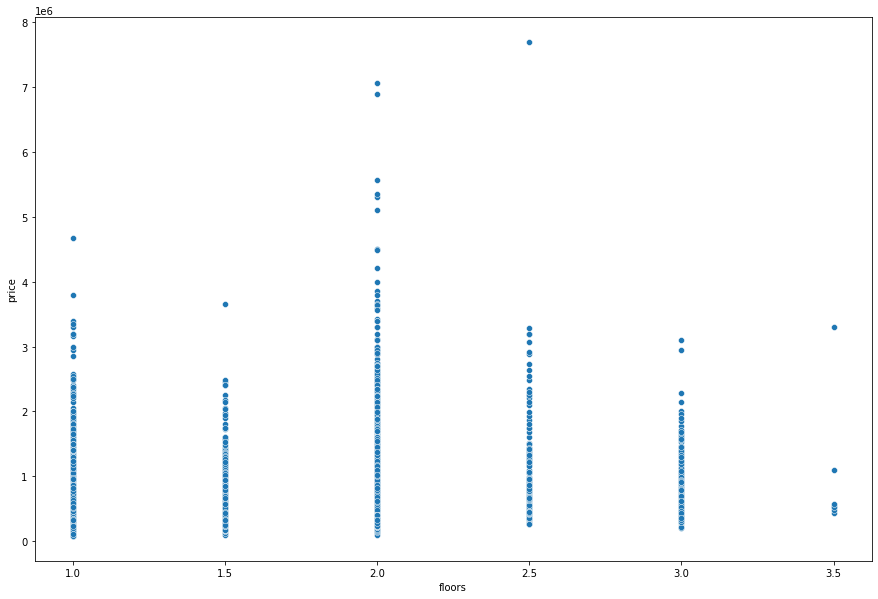

In [67]:
#plotting graph using seasborn
plt.figure(figsize=(15,10))
sns.scatterplot(df['floors'],df['price'])

In [127]:
X = df.iloc[:,1:] #Defining feature columns
y = df.iloc[:,:1] #Defining target colulm

In [128]:
y.head(10)

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,257500.0
6,291850.0
7,229500.0
8,323000.0
9,662500.0


In [78]:
#importing sklearn train test split
from sklearn.model_selection import train_test_split

In [79]:
X.shape #checking numbes of data in features

(21575, 7)

In [80]:
y.shape

(21575, 1)

In [81]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [82]:
#checking for numbers of data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15102, 7)
(15102, 1)
(6473, 7)
(6473, 1)


In [83]:
from sklearn.ensemble import RandomForestRegressor #importing Random forest regressor from slearn
from sklearn.datasets import make_regression
rfr= RandomForestRegressor()
rfr.fit(X,y)

RandomForestRegressor()

In [107]:
y_pred = rfr.predict(X) #predicting features values
y_pred

array([251172.5       , 693146.5       , 208075.        , ...,
       377153.13333333, 392677.5       , 340089.83      ])

In [108]:
r2score = rfr.score(X,y) #calculating scores
r2score

0.944870536032381

In [110]:
#calculating root mean square error
import math   #importing math for calcuations
from sklearn.metrics import mean_squared_error  #importinf mean_square_error from sklearn

mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)

In [111]:
rmse

85531.9533655333

Text(0, 0.5, 'Predicted Value')

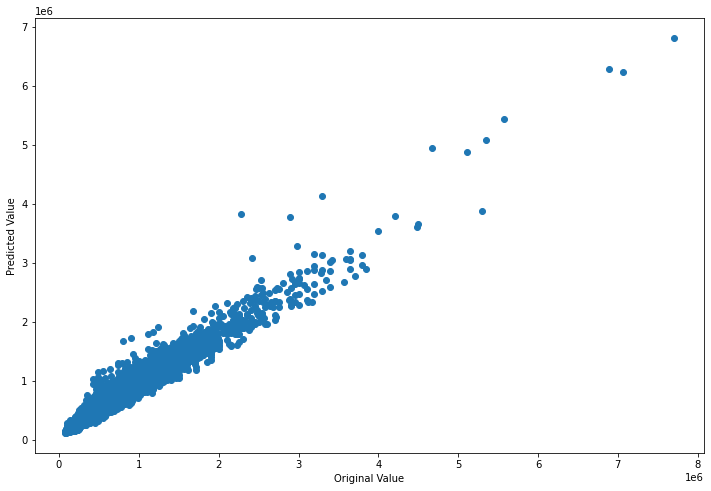

In [113]:
#plotting diagram using matplot lib
plt.figure(figsize=(12,8))
plt.scatter(y,y_pred)
plt.xlabel('Original Value')
plt.ylabel('Predicted Value')

In [115]:
#implementing linear regression
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr= lr.fit(X,y)
Y_predict=lr.predict(X)

r2_score = lr.score(X,y)
mse = mean_squared_error(y, Y_predict)
rmse = np.sqrt(mse)

In [88]:
r2_score #displaying score

0.5549239879069934

In [89]:
rmse #displaying root mean square error

243026.48169904607

In [110]:
from sklearn.model_selection import GridSearchCV
n_estimators=[200]   #number of estimators
criterion=["error"]  
max_depth=[None,7,8,45]   #intializing certain number of depth
param_grid={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth
}
reg=GridSearchCV(rfr,param_grid)
reg.fit(X_train,y_train)      # clf.fit(X_train, y_train)
GridSearchCV(estimator=RandomForestRegressor(),param_grid={
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth
})

print(reg.best_params_)  # print(clf.best_params_)

print(reg.best_score_)   # print(clf.best_score_)


KeyError: 'squared_error'